<a href="https://colab.research.google.com/github/caroheymes/Jedha_nlp_disasters_tweet/blob/master/NLP_disasters_tweet_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Disaster Tweets Exploratory Data Analysis**



# Loading librairies & data

In [ ]:
!pip install matplotlib==3.4 -q

In [ ]:
!pip install scattertext -q

     |████████████████████████████████| 7.3 MB 4.3 MB/s 
     |████████████████████████████████| 24.1 MB 1.3 MB/s 


In [ ]:
!python -m spacy download en_core_web_sm -q

     |████████████████████████████████| 12.0 MB 4.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
!pip install spacy -q

In [ ]:
!pip install unidecode -q

     |████████████████████████████████| 235 kB 4.2 MB/s 


In [ ]:
!pip install stylecloud -q

     |████████████████████████████████| 262 kB 4.1 MB/s 
     |████████████████████████████████| 161 kB 37.4 MB/s 
     |████████████████████████████████| 87 kB 6.6 MB/s 
     |████████████████████████████████| 87 kB 6.2 MB/s 


In [ ]:
#Packages

import numpy as np
import pandas as pd
import csv
from collections import Counter

import warnings
warnings.filterwarnings("ignore")
import requests
import json
import collections

# Text modules
import spacy
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.corpus import wordnet as wnl
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import collections

# Text cleaning
import unidecode
import string
import re
import html


#Figures
import seaborn as sns
import matplotlib.pyplot as plt
import stylecloud
from IPython import display
from IPython.display import HTML, Image



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/disaster tweet')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/disaster tweet/nlp-getting-started/train.csv').fillna('')

In [ ]:
df.shape

(7613, 5)

In [ ]:
#Dropping duplicates of text
df = df.drop_duplicates(subset=['text'])
df.shape

(7503, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7503 non-null   int64 
 1   keyword   7503 non-null   object
 2   location  7503 non-null   object
 3   text      7503 non-null   object
 4   target    7503 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 351.7+ KB


# Nlp tool box (code factorization)

In [ ]:
#Stopwords list
# A robust custom stopword list with many sources

# nltk corpus
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_corpus = set(stopwords.words("english"))
print('nltk_corpus : ',  len(nltk_corpus))

# spacy corpus
from spacy.lang.en.stop_words import STOP_WORDS
spacy_corpus = STOP_WORDS
print('spacy_corpus : ', len(spacy_corpus))

# sklearn corpus
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_corpus
print('sklearn_corpus : ', len(sklearn_corpus))

# gensim corpus
gensim_corpus = gensim.parsing.preprocessing.STOPWORDS
print('gensim_corpus : ', len(gensim_corpus))

# Webconf corpus
# cf https://www.webconfs.com/stop-words.php
webconf_corpus = {"able", "about", "above", "abroad", "according", "accordingly", "across", "actually", "adj", "after", "afterwards", "again", "against", "ago", "ahead", "ain't", "all", "allow", "allows", "almost", "alone", "along", "alongside", "already", "also", "although", "always", "am", "amid", "amidst", "among", "amongst", "an", "and", "another", "any", "anybody", "anyhow", "anyone", "anything", "anyway", "anyways", "anywhere", "apart", "appear", "appreciate", "appropriate", "are", "aren't", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "available", "away", "awfully", "back", "backward", "backwards", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "both", "brief", "but", "by", "came", "can", "cannot", "cant", "can't", "caption", "cause", "causes", "certain", "certainly", "changes", "clearly", "c'mon", "co", "co.", "com", "come", "comes", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn't", "course", "c's", "currently", "dare", "daren't", "definitely", "described", "despite", "did", "didn't", "different", "directly", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards", "during", "each", "edu", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "entirely", "especially", "et", "etc", "even", "ever", "evermore", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "fairly", "far", "farther", "few", "fewer", "fifth", "first", "five", "followed", "following", "follows", "for", "forever", "former", "formerly", "forth", "forward", "found", "four", "from", "further", "furthermore", "get", "gets", "getting", "given", "gives", "go", "goes", "going", "gone", "got", "gotten", "greetings", "had", "hadn't", "half", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "here's", "hereupon", "hers", "herself", "he's", "hi", "him", "himself", "his", "hither", "hopefully", "how", "howbeit", "however", "hundred", "i'd", "ie", "if", "ignored", "i'll", "i'm", "immediate", "in", "inasmuch", "inc", "inc.", "indeed", "indicate", "indicated", "indicates", "inner", "inside", "insofar", "instead", "into", "inward", "is", "isn't", "it", "it'd", "it'll", "its", "it's", "itself", "i've", "just", "k", "keep", "keeps", "kept", "know", "known", "knows", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "let's", "like", "liked", "likely", "likewise", "little", "look", "looking", "looks", "low", "lower", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mayn't", "me", "mean", "meantime", "meanwhile", "merely", "might", "mightn't", "mine", "minus", "miss", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "must", "mustn't", "my", "myself", "name", "namely", "nd", "near", "nearly", "necessary", "need", "needn't", "needs", "neither", "never", "neverf", "neverless", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "no-one", "nor", "normally", "not", "nothing", "notwithstanding", "novel", "now", "nowhere", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "on", "once", "one", "ones", "one's", "only", "onto", "opposite", "or", "other", "others", "otherwise", "ought", "oughtn't", "our", "ours", "ourselves", "out", "outside", "over", "overall", "own", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "possible", "presumably", "probably", "provided", "provides", "que", "quite", "qv", "rather", "rd", "re", "really", "reasonably", "recent", "recently", "regarding", "regardless", "regards", "relatively", "respectively", "right", "round", "said", "same", "saw", "say", "saying", "says", "second", "secondly", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "shall", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "since", "six", "so", "some", "somebody", "someday", "somehow", "someone", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specified", "specify", "specifying", "still", "sub", "such", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "there'd", "therefore", "therein", "there'll", "there're", "theres", "there's", "thereupon", "there've", "these", "they", "they'd", "they'll", "they're", "they've", "thing", "things", "think", "third", "thirty", "this", "thorough", "thoroughly", "those", "though", "three", "through", "throughout", "thru", "thus", "till", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "t's", "twice", "two", "un", "under", "underneath", "undoing", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "upwards", "us", "use", "used", "useful", "uses", "using", "usually", "v", "value", "various", "versus", "very", "via", "viz", "vs", "want", "wants", "was", "wasn't", "way", "we", "we'd", "welcome", "well", "we'll", "went", "were", "we're", "weren't", "we've", "what", "whatever", "what'll", "what's", "what've", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "where's", "whereupon", "wherever", "whether", "which", "whichever", "while", "whilst", "whither", "who", "who'd", "whoever", "whole", "who'll", "whom", "whomever", "who's", "whose", "why", "will", "willing", "wish", "with", "within", "without", "wonder", "won't", "would", "wouldn't", "yes", "yet", "you", "you'd", "you'll", "your", "you're", "yours", "yourself", "yourselves", "you've", "zero"}
print('webconf_corpus : ', len(webconf_corpus))

#build custom stop words list and dedup
custom = [w for w in nltk_corpus | spacy_corpus | sklearn_corpus | gensim_corpus | webconf_corpus]
custom = list(set(custom))
print('custom : ', len(custom))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
nltk_corpus :  179
spacy_corpus :  326
sklearn_corpus :  318
gensim_corpus :  337
webconf_corpus :  635
custom :  731


In [ ]:
#Function to tokenize tweets
def basic_clean(tweet):
  tweet = tweet.lower()
  tweet = unidecode.unidecode(tweet)
  tweet = html.unescape(tweet)
  tweet = tweet.replace("'"," ")
  tweet = re.sub(r'<.*?>', '', tweet)         # remove html tags
  tweet = re.sub('VIDEO:', '', tweet)         # remove 'VIDEO:' from start of tweet
  tweet = re.sub('AUDIO:', '', tweet)         # remove 'AUDIO:' from start of tweet
  tweet = re.sub(r'https?://\S+', '', tweet)  # Remove link
  tweet = re.sub(r'[0-9,.]+', '', tweet)      # Remove digits
  tweet = re.sub(r'@\S+', '', tweet)          # remove tweeted at
  tweet = re.sub(r'\brt\b', '', tweet).strip()# Remove RT
  tweet = re.sub('\n',' ', tweet)            # Remove line breaks
  tweet = re.sub('\s+', ' ', tweet).strip()   # Remove leading, trailing, and extra spaces
  tweet = re.sub("(.)\\1{3,}", "\\1", tweet)  # Remove duplicate caracters in strings
  tweet = ' '.join(nltk.RegexpTokenizer(r"\w+").tokenize(tweet)) #remove punctuation
  
  return tweet

def de_abbreviate(tweet):# cf https://github.com/bicachu/topic-modeling-health-tweets/blob/master/notebooks/clean_tokenizer.py
  abbreviations = json.load(open('/content/drive/MyDrive/disaster tweet/abbreviations.json'))
  if isinstance(tweet, str):
    for key in abbreviations:
      value = abbreviations[key]
      raw_text = r'\b' + key + r'\b'
      x = re.sub(raw_text, value, tweet)	
    return tweet
  else:
    return tweet

def remove_stopwords(tweet):
	return ' '.join([word for word in tweet.split() if word not in custom])
 
def lemmatize(token):
  return WordNetLemmatizer().lemmatize(token, pos='n')

def process_cleaning(tweet):
  """custom function to clean tweets"""
  tweet = de_abbreviate(tweet) #In fiest because of "'"
  tweet = basic_clean(tweet)
  tweet = remove_stopwords(tweet)
  tweet =' '.join([lemmatize(token) for token in tweet.split() if len(token) > 2])
  return tweet

for tweet in df.text.values[:5]:
  print()
  print(tweet)
  print(process_cleaning(tweet))


Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
deed reason earthquake allah forgive

Forest fire near La Ronge Sask. Canada
forest ronge sask canada

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
resident asked shelter place notified officer evacuation shelter place order expected

13,000 people receive #wildfires evacuation orders in California 
people receive wildfire evacuation order california

Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
photo ruby alaska smoke wildfire pours school


jedha team eat jedha enjoy jedha



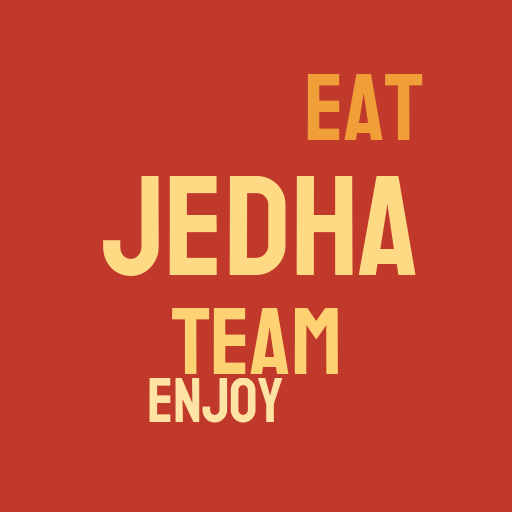

In [ ]:
# import stylecloud
# from IPython import display

#Custom function for generating word clouds
def generate_wordcloud_2(tweets, image_name) : 
  img = stylecloud.gen_stylecloud(text=tweets,
                            icon_name = 'fab fa-twitter',
                            palette =  'colorbrewer.sequential.YlOrBr_3',
                            gradient = 'horizontal',
                            background_color='#c0392b',
                            output_name=image_name + '.png',
                            collocations = False,
                            custom_stopwords=custom,  
                          )
  return img

#Testing the generate_wordcloud_2 function
text = "jedhaaaaaaa tea12m is gr#[\eat. Thanks jedha & enjoy... jedha!"
text = process_cleaning(text)
print(text)
print()
generate_wordcloud_2(text,'merci')
display.Image("merci.png")

# Bivariate Analysis

In [ ]:
# Lets add some numeric features for analysis
df['n_letters']   = df['text'].str.len()
df['n_keywords']  = df['keyword'].str.split().str.len()
df['hashtag']     = [', '.join(re.findall(r"#(\w+)", x)) for x in df.text]
df['n_hashtags']  = df['hashtag'].str.split().str.len()
df['mentions']    = [', '.join(re.findall(r"@(\w+)", x)) for x in df.text]
df['n_mentions']  = df['mentions'].str.split().str.len()
df['n_words']     = df['text'].str.split().str.len()
df['retweets']    = [', '.join(re.findall(r"RT\s", x)) for x in df.text]
df['n_retweets']  = df['retweets'].str.split().str.len()
df['links']       = [', '.join(re.findall(r"http\S+", x)) for x in df.text]
df['n_links']     = df['links'].str.split().str.len()
df['video']       = [', '.join(re.findall(r"VIDEO", x)) for x in df.text]
df['n_videos']    = df['video'].str.split().str.len()

# Focus on numeric features
numeric_columns = [x for x in df.columns if 'n_' in x or x == 'target']
num = df[numeric_columns]
num['target'] = ['disaster' if x == 1 else 'unknown_topic' for x in df.target]
num.sample(5)


,target,n_letters,n_keywords,n_hashtags,n_mentions,n_words,n_retweets,n_links,n_videos
1208,disaster,133,1,0,0,23,0,0,0
5701,unknown_topic,143,1,0,1,26,0,0,0
1615,unknown_topic,73,1,0,2,10,0,0,0
1669,unknown_topic,113,1,0,0,19,0,0,0
65,disaster,76,1,0,1,8,0,1,0


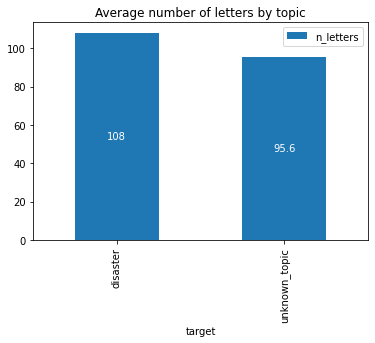

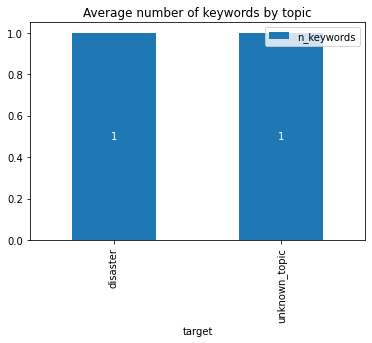

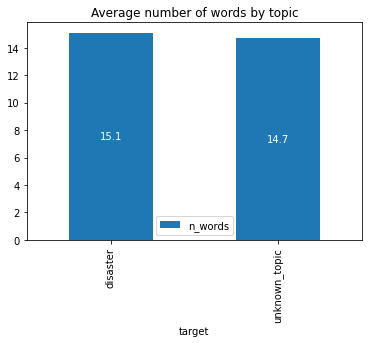

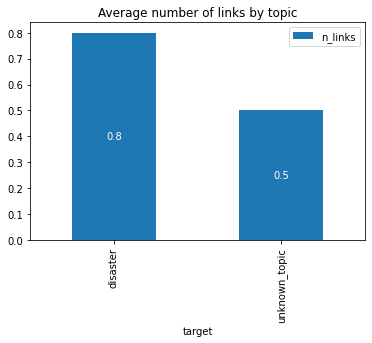

In [ ]:

#function for plotting numeric features by topic
def plot_features_by_topic(column_name) : 
  if num[['target',column_name]].groupby(['target']).agg('mean').round().sum(axis=1).values.sum() > 0: #no empty values
    ax = num[['target',column_name]].groupby(['target']).agg('mean').round(1).plot(kind='bar');
    for c in ax.containers:
      ax.bar_label(c, label_type='center', color = 'white')
    plt.title('Average number of ' + column_name[2:] + ' by topic' );

for item in num.columns[1:] :
  plot_features_by_topic(item)
  

**Conclusion :** No significal difference among topics in numeric features

Text(0.5, 0.9, 'Bivariate analysis of numeric features')

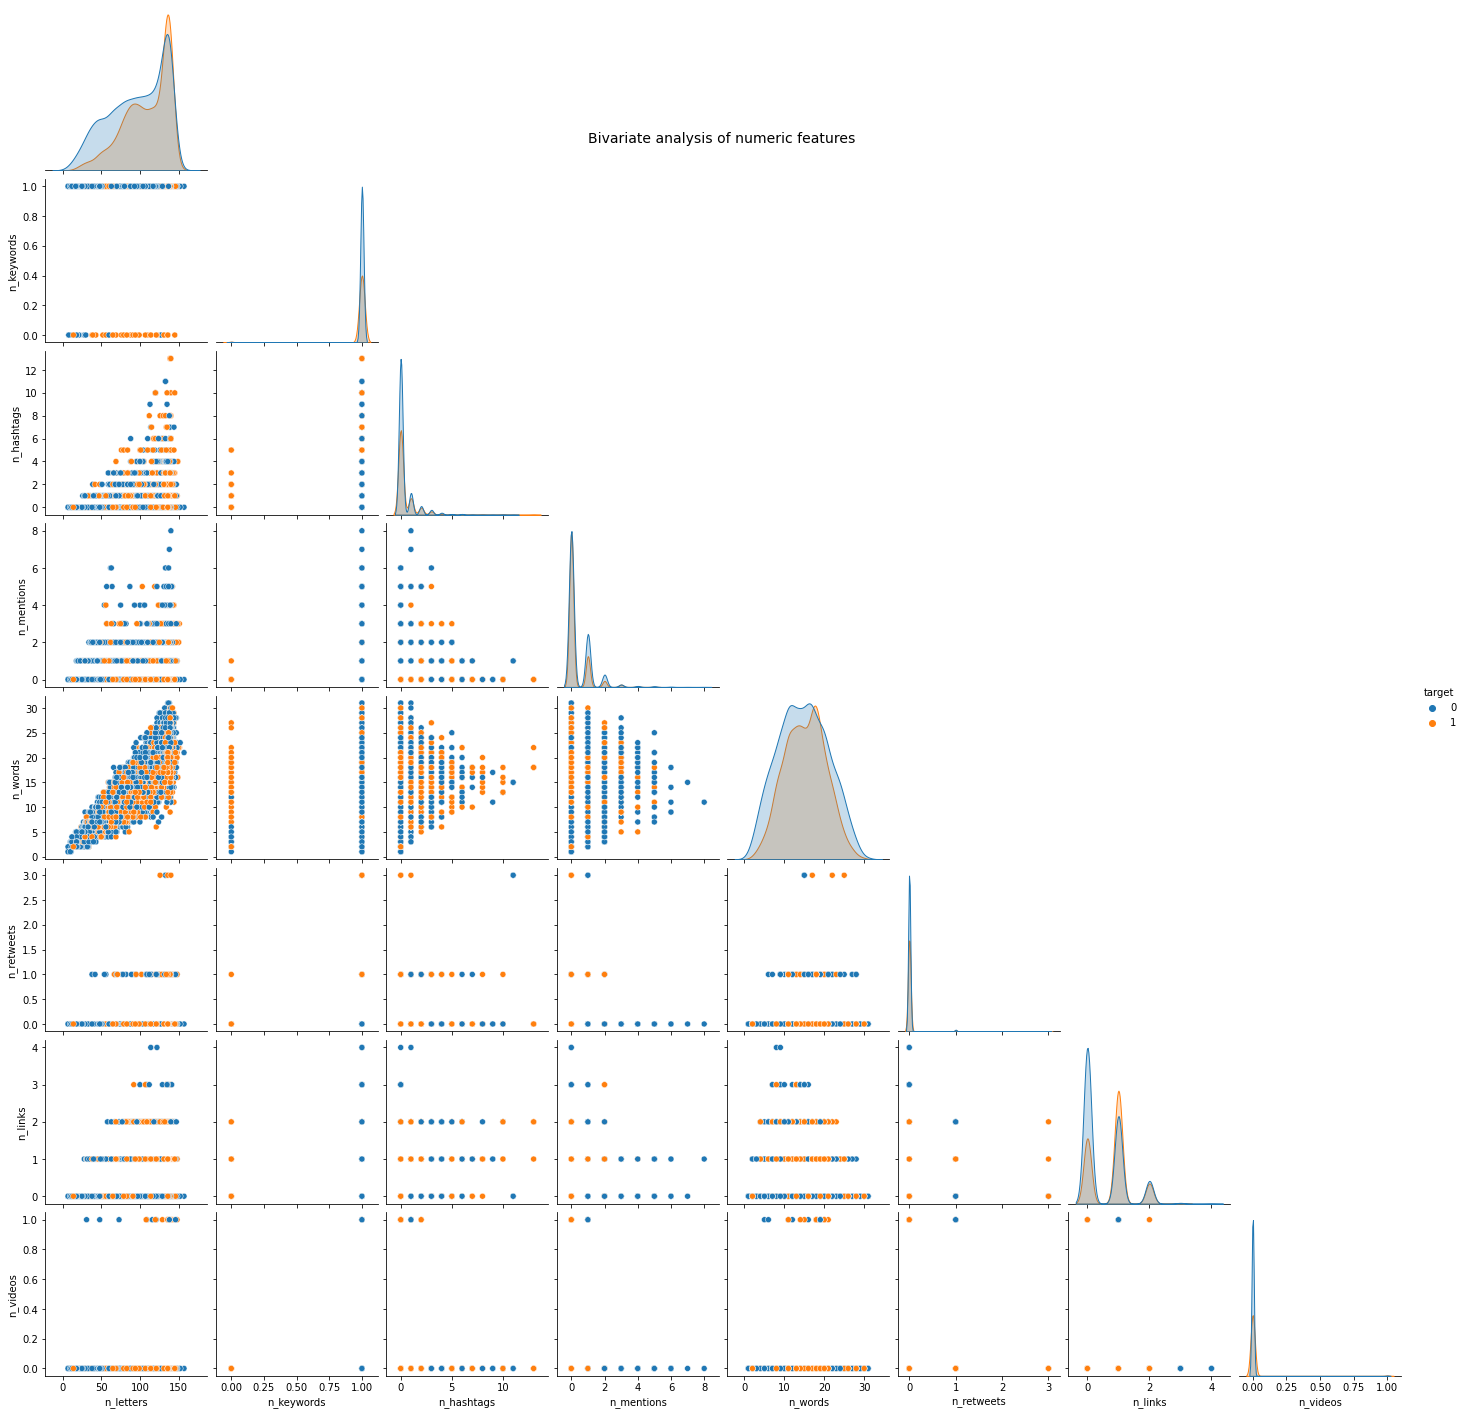

In [ ]:
#Bivariate plot
numeric_columns = [x for x in df.columns if 'n_' in x or x == 'target']
sns.pairplot(df[numeric_columns],hue='target',corner=True,);
plt.suptitle('Bivariate analysis of numeric features', size=14, y=0.9)

**Conclusion:** 
This shows no clear relation between numeric features and topics

# Keywords, hashtags & tweets analysis

**Tweet proportion by topic**

In [ ]:
df.target.value_counts(normalize=True).mul(100).round().reset_index().values.astype(str)

array([['0.0', '57.0'],
       ['1.0', '43.0']], dtype='<U32')

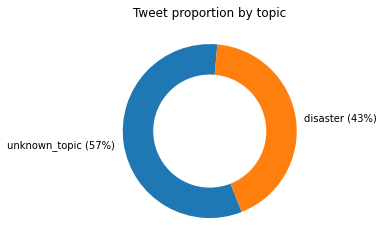

In [ ]:
# Plot tweets proportion by topic
ax = plt.pie(df.target.value_counts(), 
             labels = df.target.value_counts().index.map({0:'unknown_topic (57%)',1:'disaster (43%)'}),
             startangle=85)
centre_circle = plt.Circle((0,0),0.65,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Tweet proportion by topic")
plt.show()

In [ ]:
#Links analysis
df.groupby(['target', 'links'])['text'].size().unstack().T.rename(columns={0: 'unknown_topic', 1:'disaster'}).sort_values(by='disaster', ascending=False).head(20)

target,unknown_topic,disaster
links,,
,2511.0,1050.0
"http://t.co/LvlH3W3aWO, http://t.co/vIwXY1XDYK",NaN,4.0
http://t.co/cybKsXHF7d,2.0,3.0
http://t.co/V3aZWOAmzK,NaN,3.0
http://t.co/cEdCUgEuWs,NaN,3.0
http://t.co/EYSVvzA7Qm,NaN,2.0
http://t.co/jhpdSSVhvE,NaN,2.0
http://t.co/sAF9MoSkSN,NaN,2.0
http://t.co/po19h8YCND,NaN,2.0


In [ ]:
# Conclusion : No specific input !

## Keyword analysis

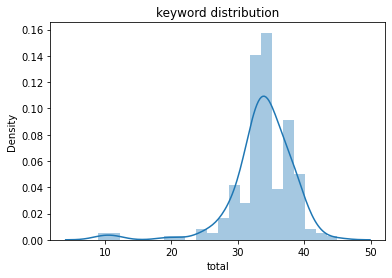

In [ ]:
#Main keyword analysis
df['keyword'] = [x.lower().replace('%20', ' ') for x in df.keyword if isinstance(x, str)]
main_kw = df[df.keyword != ''][['target', 'keyword']].groupby(['target'])['keyword'].value_counts().unstack().T
main_kw['total'] = main_kw.sum(axis=1)
main_kw = main_kw.sort_values(by='total', ascending=False)
sns.distplot(main_kw.total).set_title('keyword distribution');


In [ ]:
# Finding the top keywords
main_kw['total_cum'] = main_kw.total.cumsum() #Adding column for cumulated count of words
main_kw["perc_cum"] = main_kw['total'].cumsum() / main_kw.total.sum(axis=0)*100
main_kw = main_kw.reset_index()
main_kw.head(20) #account for ~10% of the total

target,keyword,0,1,total,total_cum,perc_cum
0,fatalities,19.0,26.0,45.0,45.0,0.604270
1,deluge,36.0,6.0,42.0,87.0,1.168256
2,armageddon,37.0,5.0,42.0,129.0,1.732241
3,damage,22.0,19.0,41.0,170.0,2.282798
4,body bags,40.0,1.0,41.0,211.0,2.833356
5,harm,37.0,4.0,41.0,252.0,3.383913
6,windstorm,24.0,16.0,40.0,292.0,3.921042
7,twister,35.0,5.0,40.0,332.0,4.458171
8,siren,35.0,5.0,40.0,372.0,4.995300
9,evacuate,15.0,25.0,40.0,412.0,5.532429


In [ ]:
head = main_kw.head(50).rename(columns={0: 'unknown_topic', 1:'disaster'}).drop(columns=['total','total_cum','perc_cum'	]).set_index(['keyword'])
head

target,unknown_topic,disaster
keyword,,
fatalities,19.0,26.0
deluge,36.0,6.0
armageddon,37.0,5.0
damage,22.0,19.0
body bags,40.0,1.0
harm,37.0,4.0
windstorm,24.0,16.0
twister,35.0,5.0
siren,35.0,5.0


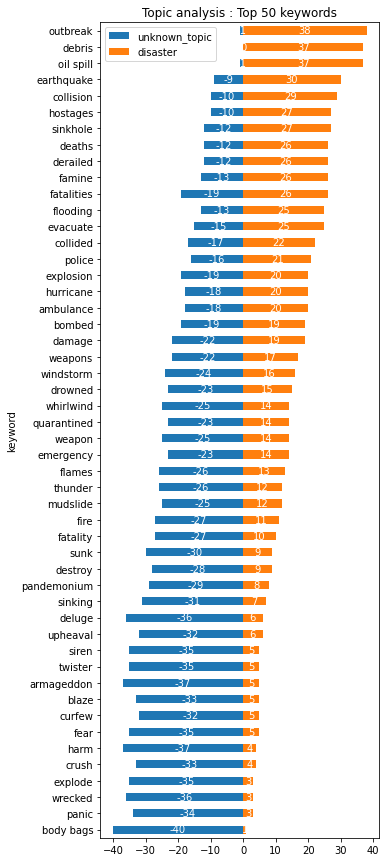

In [ ]:
#Top 50 plot
fig, ax = plt.subplots(figsize=(5, 15))
ax = head.sort_values(by='disaster', ascending=True).unknown_topic.mul(-1).plot(kind='barh', color='tab:blue') #inverse the value for plot
ax=head.sort_values(by='disaster', ascending=True).disaster.plot(kind='barh', color="tab:orange")
for c in ax.containers:
  ax.bar_label(c, label_type='center', color="white")
plt.legend(loc='best')
plt.title('Topic analysis : Top 50 keywords');

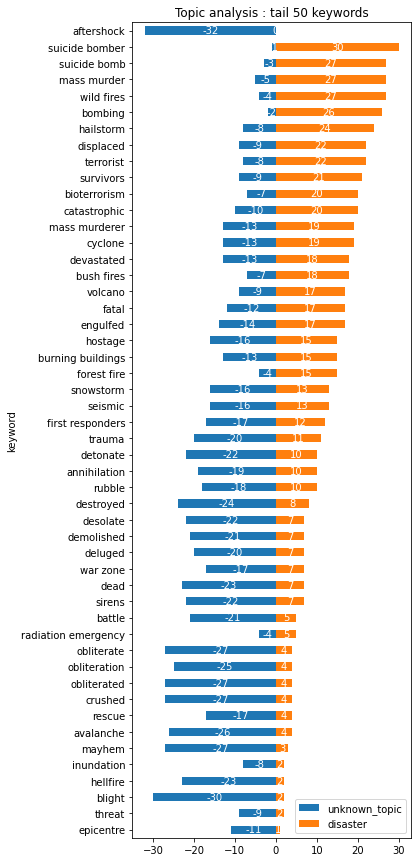

In [ ]:
tail = main_kw.tail(50).rename(columns={0: 'unknown_topic', 1:'disaster'}).drop(columns=['total','total_cum','perc_cum'	]).set_index(['keyword'])
tail
#Tail 50 plot
fig, ax = plt.subplots(figsize=(5, 15))
ax = tail.sort_values(by='disaster', ascending=True).unknown_topic.mul(-1).plot(kind='barh', color='tab:blue') #inverse the value for plot
ax=tail.sort_values(by='disaster', ascending=True).disaster.plot(kind='barh', color="tab:orange")
for c in ax.containers:
  ax.bar_label(c, label_type='center', color="white")
plt.legend(loc='best')
plt.title('Topic analysis : tail 50 keywords');

**Conclusion:** Keywords seem to be rather specific to topics (disaster or unknown)


In [ ]:
os.chdir('/content/drive/MyDrive/disaster tweet/figures')

All keywords


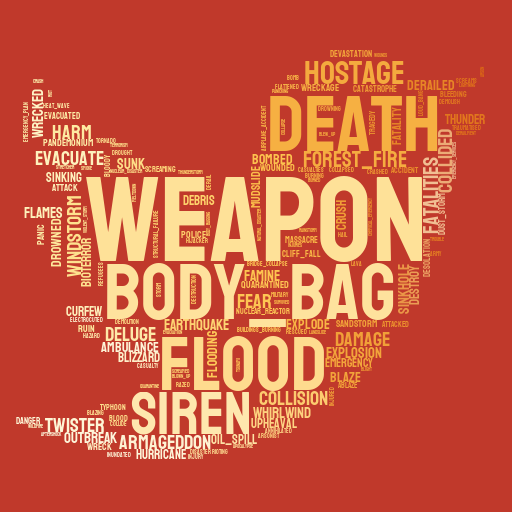

In [ ]:
# All keywords plot
generate_wordcloud_2(' '.join([x.replace(' ', '_') for x in df.keyword.values if x != '']),'all_keywords')
print('All keywords')
display.Image("all_keywords.png")

Disasters_keywords


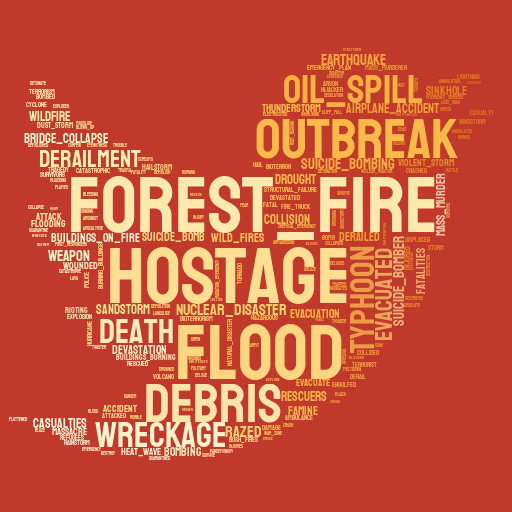

In [ ]:
# Keywords related with disasters plot
generate_wordcloud_2(' '.join([x.replace(' ', '_') for x in df[df.target == 1].keyword.values if x != '']),'disasters_keywords')
print('Disasters_keywords')
display.Image("disasters_keywords.png")


Unknown topic keywords


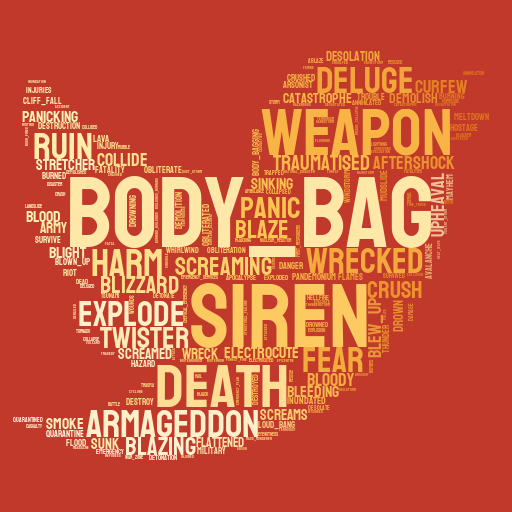

In [ ]:
# Keywords related with unknown topic plot
generate_wordcloud_2(' '.join([x.replace(' ', '_') for x in df[df.target == 0].keyword.values if x != '']),'unknown_topic_keywords')
print('Unknown topic keywords')
display.Image("unknown_topic_keywords.png")

Unknown topic keywords


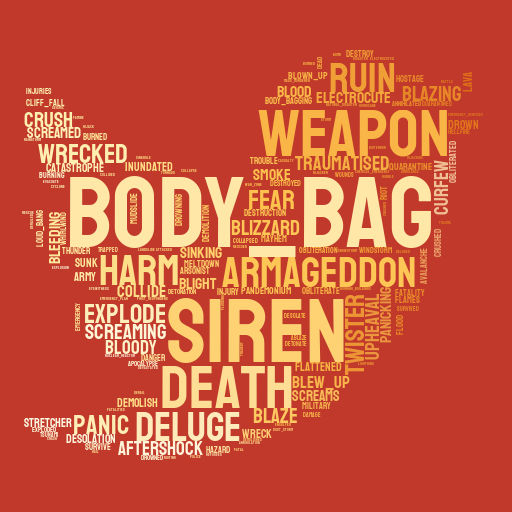

In [ ]:
# Keywords related with unknown topic plot
generate_wordcloud_2(' '.join([x.replace(' ', '_') for x in df[df.target == 0].keyword.values if x != '']),'unknown_topic_keywords')
print('Unknown topic keywords')
display.Image("unknown_topic_keywords.png")

## Hashtag analysis

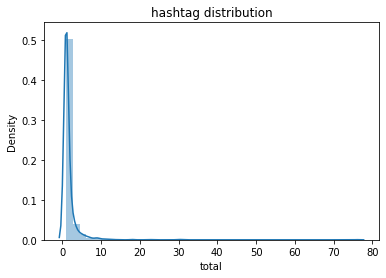

In [ ]:
#Explode hashtags values in hashtag column
main_h = df[df.n_hashtags> 0][['target', 'hashtag']].set_index(['target']).apply(lambda x: x.str.split(',').explode()).reset_index()
main_h['hashtag'] = [x.lower().strip() for x in main_h.hashtag if isinstance(x, str)]
main_h = main_h.groupby(['target'])['hashtag'].value_counts().unstack().T
main_h['total'] = main_h.sum(axis=1)
main_h = main_h.sort_values(by='total', ascending=False)

sns.distplot(main_h.total).set_title('hashtag distribution');

In [ ]:
# Finding the top hashtags
main_h['total_cum'] = main_h.total.cumsum() #Adding column for cumulated count of words
main_h["perc_cum"] = main_h['total'].cumsum() / main_h.total.sum(axis=0)*100
main_h = main_h.reset_index()
main_h.head(20) #account for ~11.8% of the total

target,hashtag,0,1,total,total_cum,perc_cum
0,news,20.0,56.0,76.0,76.0,2.346403
1,hot,18.0,13.0,31.0,107.0,3.303489
2,best,17.0,13.0,30.0,137.0,4.229701
3,prebreak,17.0,13.0,30.0,167.0,5.155912
4,nowplaying,21.0,2.0,23.0,190.0,5.866008
5,hiroshima,NaN,22.0,22.0,212.0,6.545230
6,gbbo,14.0,4.0,18.0,230.0,7.100957
7,earthquake,NaN,18.0,18.0,248.0,7.656684
8,jobs,14.0,NaN,14.0,262.0,8.088916
9,islam,8.0,5.0,13.0,275.0,8.490275


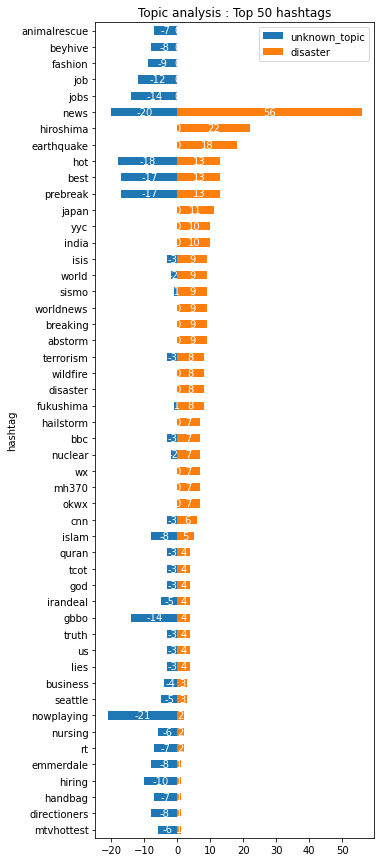

In [ ]:
head = main_h.head(50).rename(columns={0: 'unknown_topic', 1:'disaster'}).drop(columns=['total','total_cum','perc_cum'	]).set_index(['hashtag'])
#Top 50 plot
fig, ax = plt.subplots(figsize=(5, 15))
ax = head.sort_values(by='disaster', ascending=True).unknown_topic.mul(-1).plot(kind='barh', color='tab:blue') #inverse the value for plot
ax=head.sort_values(by='disaster', ascending=True).disaster.plot(kind='barh', color="tab:orange")
for c in ax.containers:
  ax.bar_label(c, label_type='center', color="white")
plt.legend(loc='best')
plt.title('Topic analysis : Top 50 hashtags');

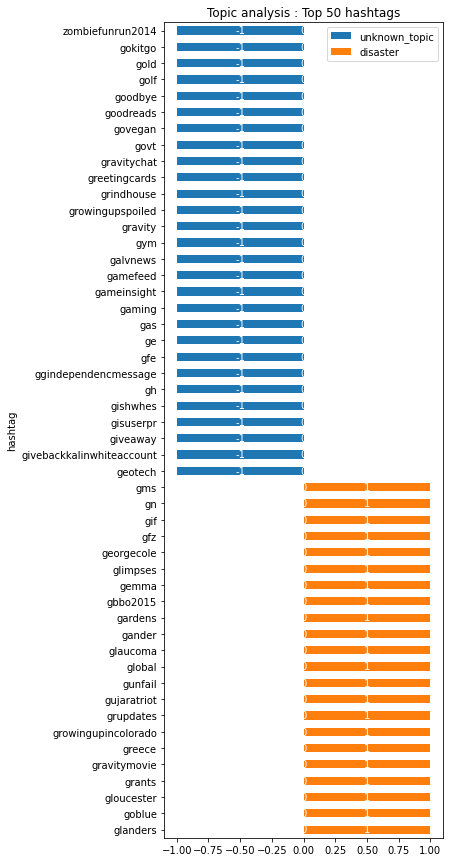

In [ ]:
tail = main_h.tail(50).rename(columns={0: 'unknown_topic', 1:'disaster'}).drop(columns=['total','total_cum','perc_cum'	]).set_index(['hashtag'])
#Top 50 plot
fig, ax = plt.subplots(figsize=(5, 15))
ax = tail.sort_values(by='disaster', ascending=True).unknown_topic.mul(-1).plot(kind='barh', color='tab:blue') #inverse the value for plot
ax=tail.sort_values(by='disaster', ascending=True).disaster.plot(kind='barh', color="tab:orange")
for c in ax.containers:
  ax.bar_label(c, label_type='center', color="white")
plt.legend(loc='best')
plt.title('Topic analysis : Top 50 hashtags');

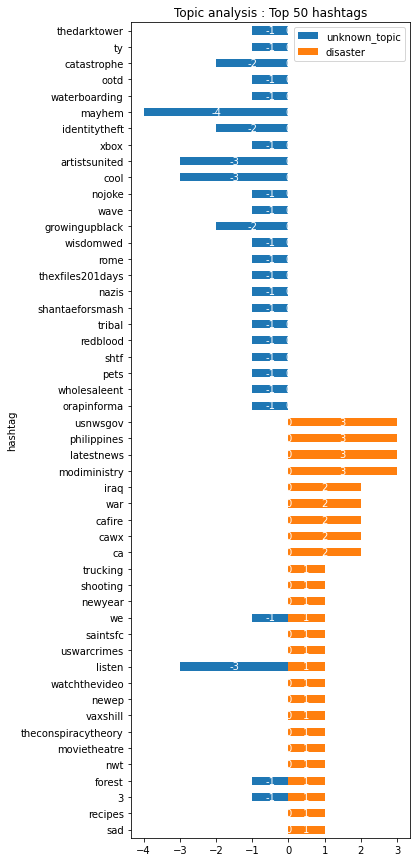

In [ ]:
#random selection of 50 records & plot
temp = main_h.reset_index()
temp = temp[(temp.index > 100) & (temp.index < 1000)].sample(50).rename(columns={0: 'unknown_topic', 1:'disaster'}).drop(columns=['total','total_cum','perc_cum'	]).set_index(['hashtag'])


fig, ax = plt.subplots(figsize=(5, 15))
ax = temp.sort_values(by='disaster', ascending=True).unknown_topic.mul(-1).plot(kind='barh', color='tab:blue') #inverse the value for plot
ax=temp.sort_values(by='disaster', ascending=True).disaster.plot(kind='barh', color="tab:orange")
for c in ax.containers:
  ax.bar_label(c, label_type='center', color="white")
plt.legend(loc='best')
plt.title('Topic analysis : Top 50 hashtags');

In [ ]:
#Filtering DataFrame for figures generation
all_hashtags = df[['target', 'hashtag']].set_index(['target']).apply(lambda x: x.str.split(',').explode()).reset_index()
all_hashtags['hashtag'] = [x.lower() for x in all_hashtags['hashtag'] if isinstance(x, str)]
all_hashtags = all_hashtags[all_hashtags.hashtag != '']
all_hashtags.sample(5)

,target,hashtag
4367,0,choosegod
3403,0,cadrought
8173,1,childhood
1013,0,overwatch
3251,1,health


All hashtag


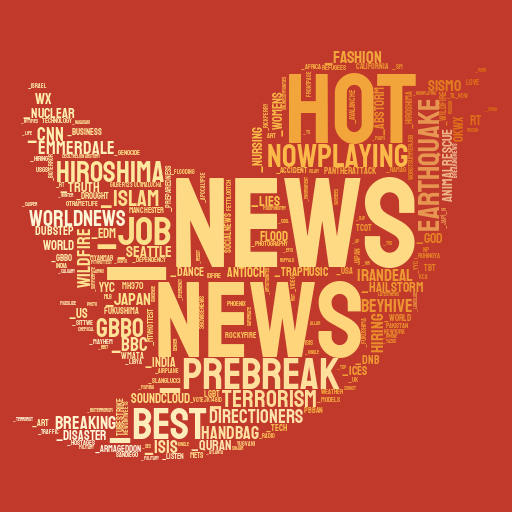

In [ ]:
# All hastags plot
generate_wordcloud_2(' '.join([x.replace(' ', '_') for x in all_hashtags.hashtag.values if x != '']),'all_hashtag')
print('All hashtag')
display.Image("all_hashtag.png")

disasters_hashtagg


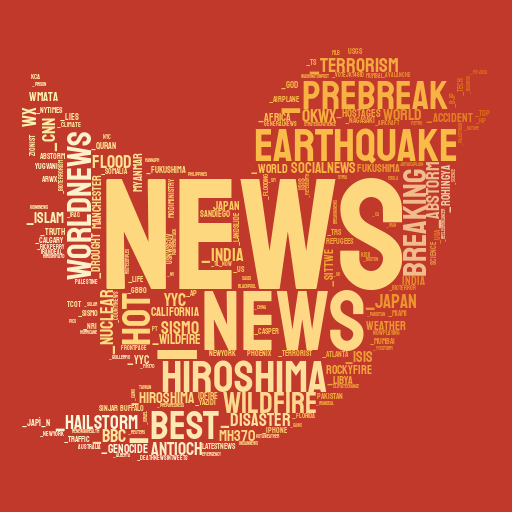

In [ ]:
# hastags with disaster topic plot
generate_wordcloud_2(' '.join([x.replace(' ', '_') for x in all_hashtags[all_hashtags.target == 1].hashtag.values if x != '']),'disasters_hashtag')
print('disasters_hashtagg')
display.Image("disasters_hashtag.png")

unknown topic_hashtag


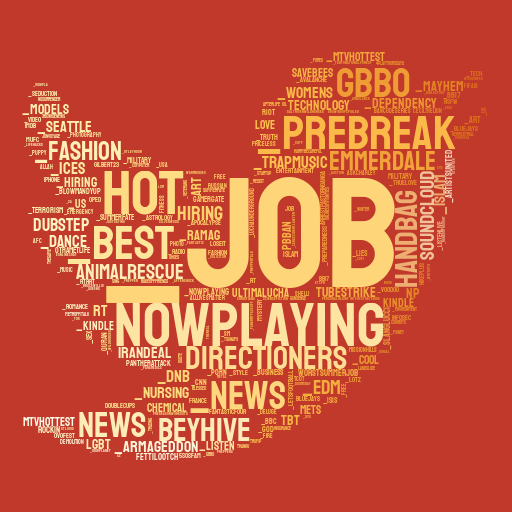

In [ ]:
# Hastags with unknown topic plot
generate_wordcloud_2(' '.join([x.replace(' ', '_') for x in all_hashtags[all_hashtags.target == 0].hashtag.values if x != '']),'unknown_topic_hashtag')
print('unknown topic_hashtag')
display.Image("unknown_topic_hashtag.png")

## Text tweet analysis

In [ ]:
df['token'] = [process_cleaning(tweet) for tweet in df.text if tweet != '']
df[['text', 'token']].sample(10)

,text,token
1527,Emergency Response and Hazardous Chemical Mana...,emergency response hazardous chemical manageme...
4220,@igmpj aren't dangling piercing crystals poten...,dangling piercing crystal potentially hazardou...
1227,Witness video shows car explode behind burning...,witness video show car explode burning buildin...
7072,Loan Upheaval Is The Way In Which Oneself Can ...,loan upheaval oneself save house leaving forec...
6961,@TSUNAMI_nopeach ?????? I'm weak af,weak
1341,#KCA #VoteJKT48ID DUCKVILLELOL: Burning flips ...,kca votejktid duckvillelol burning flip table ...
4104,Hi-Res Doppler showing storm just NE of Edmond...,re doppler showing storm edmond severe hail mp...
3712,FEAR - YouTube http://t.co/PrmtxjJdue,fear youtube
5534,#hot Reddit's new content policy goes into ef...,hot reddit content policy effect horrible subr...
3944,Flood Advisory issued August 05 at 7:10PM CDT ...,flood advisory issued august cdt august cdt nw...


All tweets


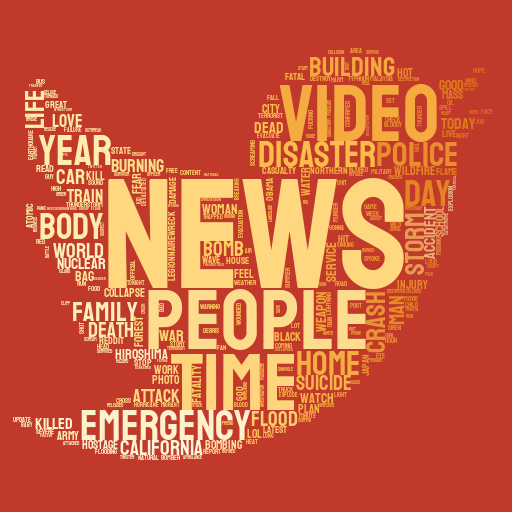

In [ ]:
# All tweets plot
generate_wordcloud_2(' '.join([token for token in df.token.values if token != '']),'all_tweets')
print('All tweets')
display.Image("all_tweets.png")

Disasters tweets


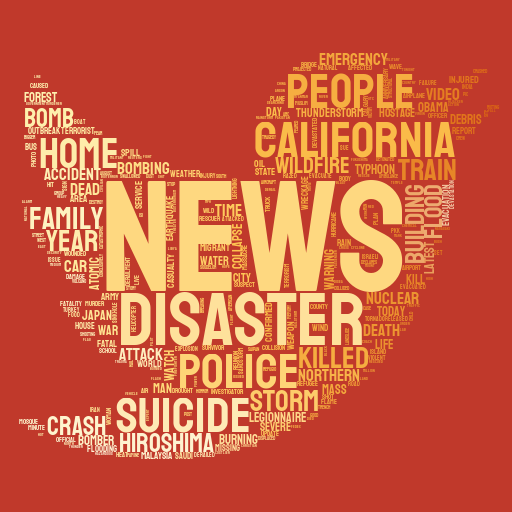

In [ ]:
# Tweets related with disasters plot
generate_wordcloud_2(' '.join([token for token in df[df.target == 1].token.values if token != '']),'disasters_tweets')
print('Disasters tweets')
display.Image("disasters_tweets.png")

Unknown topic tweets


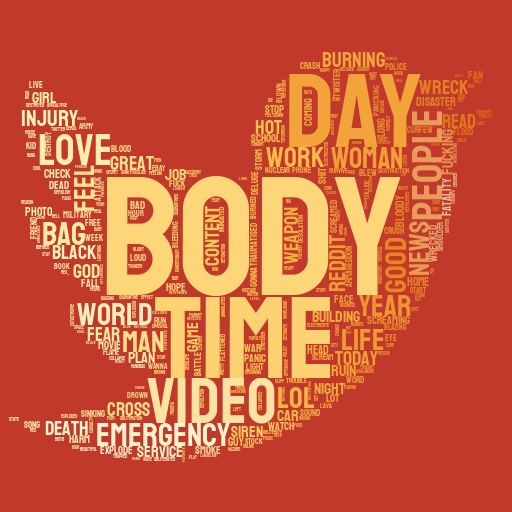

In [ ]:
# Tweets related with unknown topic plot
generate_wordcloud_2(' '.join([token for token in df[df.target == 0].token.values if token != '']),'unknown_topic_tweets')
print('Unknown topic tweets')
display.Image("unknown_topic_tweets.png")

## Scattertext of tweets

Scattertext is an elegant, interactive tool to elevate text analysis.


**Citation**
Jason S. Kessler. Scattertext: a Browser-Based Tool for Visualizing how Corpora Differ. ACL System Demonstrations. 2017. Link to preprint: arxiv.org/abs/1703.00565

```

@article{kessler2017scattertext,
  author    = {Kessler, Jason S.},
  title     = {Scattertext: a Browser-Based Tool for Visualizing how Corpora Differ},
  booktitle = {Proceedings of ACL-2017 System Demonstrations},
  year      = {2017},
  address   = {Vancouver, Canada},
  publisher = {Association for Computational Linguistics},
}

```




In [ ]:
#Building the corpus
!pip install scattertext -q

In [ ]:
import scattertext as st

In [ ]:
!scattertext --help

In [ ]:
# Turn the data into a Scattertext Corpus
df['target'] = df['target'].map({1 :'disaster', 0 : 'unknown'})
nlp = spacy.load('en')
corpus = st.CorpusFromPandas(df, 
                              category_col='target', 
                              text_col='token',
                              nlp=nlp).build()

In [ ]:
html = st.produce_scattertext_explorer(corpus,
          category='disaster',
          category_name='Disaster',
          not_category_name='Unknow',
          width_in_pixels=1000,
          minimum_term_frequency=8
          
          )
open("data_visualization.html", 'wb').write(html.encode('utf-8'))

1260683

In [ ]:
import IPython
IPython.display.HTML(filename='/content/drive/MyDrive/disaster tweet/figures/data_visualization.html')

For an interactive experience, please open 
https://drive.google.com/file/d/1-nG7SExgWTAdL2f9u10Wxqvv2l7Nudro/view?usp=sharing

Then save and open the html file in your favorite browser
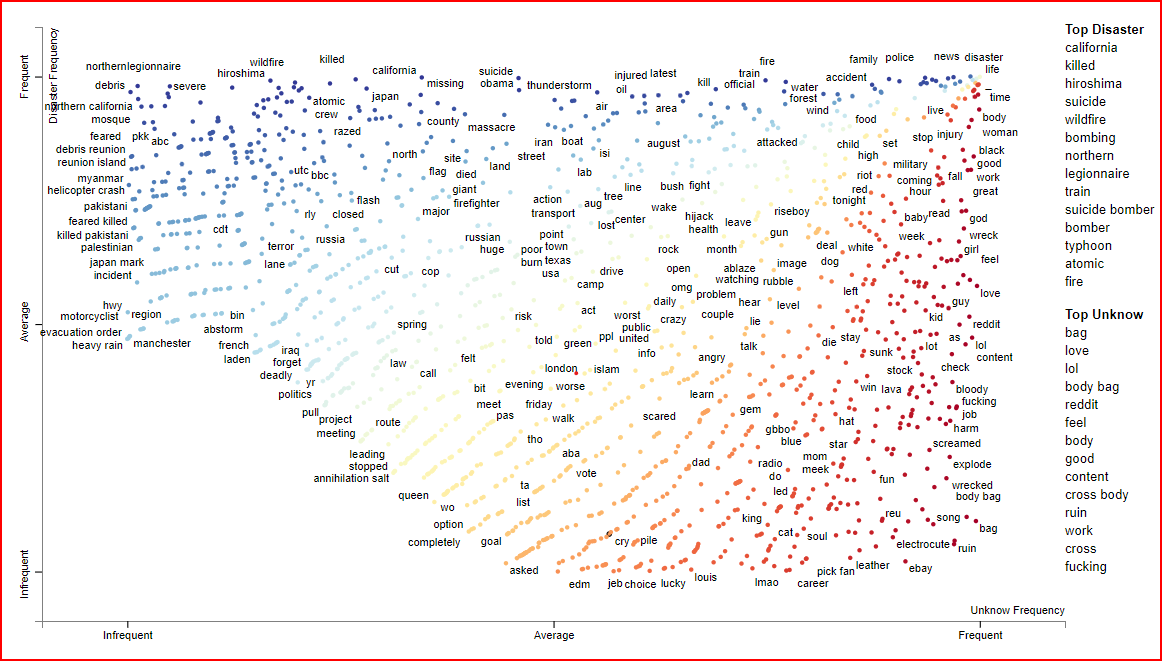